In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import bff
# import pingouin as pg
#import researchpy
# Plotting packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

In [52]:
df = pd.read_excel("covid_p.xlsx")
df = df.dropna()
df

,ParticipantID,Country,Ide,Policy,Hygiene,Contact,Action,Ide_extremes
7,p8,United Arab Emirates,C,5.8,6.8,7.4,6.666667,C
19,p20,United Arab Emirates,C,7.6,10.0,7.8,8.466667,C
23,p24,United Arab Emirates,C,7.6,7.6,7.8,7.666667,C
24,p25,United Arab Emirates,C,10.0,8.8,8.0,8.933333,C
32,p33,United Arab Emirates,L,10.0,10.0,7.2,9.066667,L
...,...,...,...,...,...,...,...,...
51343,p51344,South Africa,L,8.0,7.2,8.2,7.800000,L
51366,p51367,South Africa,L,10.0,9.2,8.2,9.133333,L
51370,p51371,South Africa,L,8.8,9.2,7.8,8.600000,L
51377,p51378,South Africa,C,3.0,7.8,6.2,5.666667,C


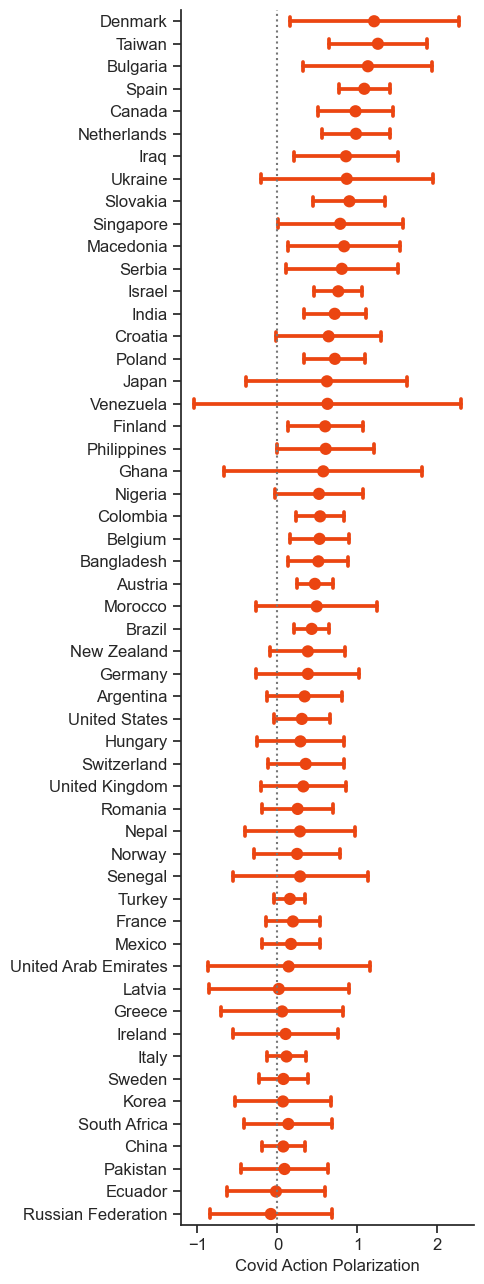

In [62]:
records = []
for groupid, group in df.groupby("Country"):
    # Collect sample size, mean, and var for each Ide_extremesology
    n, mean, var = [], [], []
    # Drop NaN Ide_extremesology and sort by Ide_extremesology; Conservative will always come FIRST
#     group = group.dropna(subset=["Ide_extremes"])
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ide_extremesology
    for subgroupid, subgroup in group.groupby("Ide_extremes"):
        if subgroupid == 0:
            continue
        if subgroup.shape[0] < 2:
            continue # Some Ide_extremesologies with country have no data
        n.append(subgroup.shape[0])
        mean.append(subgroup["Action"].mean())
        var.append(subgroup["Action"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confIde_extremesnce_intervals/bs704_confIde_extremesnce_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "Action": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="Action", ascending=False)
dfdiff["absdifference"] = dfdiff["Action"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)
pal = ["#EB4511"]
fig, ax = plt.subplots(1,1, figsize=(5,13))
# dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Covid Action Polarization")
# plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('Covid_Action.png', dpi=600, format="png")

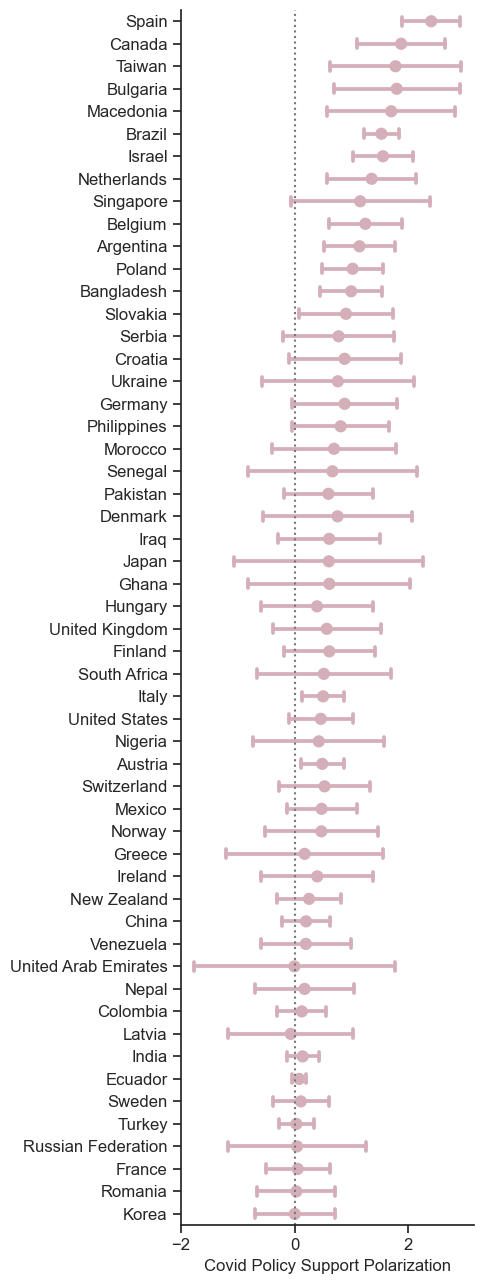

In [63]:
records = []
for groupid, group in df.groupby("Country"):
    # Collect sample size, mean, and var for each Ide_extremesology
    n, mean, var = [], [], []
    # Drop NaN Ide_extremesology and sort by Ide_extremesology; Conservative will always come FIRST
#     group = group.dropna(subset=["Ide_extremes"])
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ide_extremesology
    for subgroupid, subgroup in group.groupby("Ide_extremes"):
        if subgroupid == 0:
            continue
        if subgroup.shape[0] < 2:
            continue # Some Ide_extremesologies with country have no data
        n.append(subgroup.shape[0])
        mean.append(subgroup["Policy"].mean())
        var.append(subgroup["Policy"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confIde_extremesnce_intervals/bs704_confIde_extremesnce_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "Policy": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="Policy", ascending=False)
dfdiff["absdifference"] = dfdiff["Policy"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)
pal = ["#D4AFB9"]
fig, ax = plt.subplots(1,1, figsize=(5,13))
# dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Covid Policy Support Polarization")
# plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('Covid_Policy.png', dpi=600, format="png")

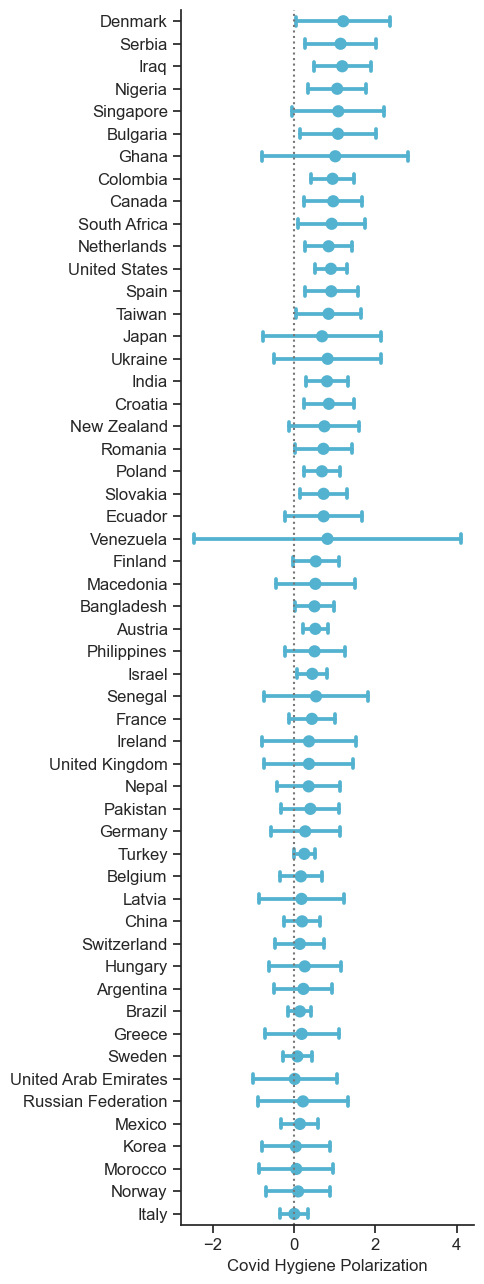

In [64]:
records = []
for groupid, group in df.groupby("Country"):
    # Collect sample size, mean, and var for each Ide_extremesology
    n, mean, var = [], [], []
    # Drop NaN Ide_extremesology and sort by Ide_extremesology; Conservative will always come FIRST
#     group = group.dropna(subset=["Ide_extremes"])
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ide_extremesology
    for subgroupid, subgroup in group.groupby("Ide_extremes"):
        if subgroupid == 0:
            continue
        if subgroup.shape[0] < 2:
            continue # Some Ide_extremesologies with country have no data
        n.append(subgroup.shape[0])
        mean.append(subgroup["Hygiene"].mean())
        var.append(subgroup["Hygiene"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confIde_extremesnce_intervals/bs704_confIde_extremesnce_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "Hygiene": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="Hygiene", ascending=False)
dfdiff["absdifference"] = dfdiff["Hygiene"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)
pal = ["#52B2CF"]
fig, ax = plt.subplots(1,1, figsize=(5,13))
# dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Covid Hygiene Polarization")
# plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('Covid_Hygiene.png', dpi=600, format="png")

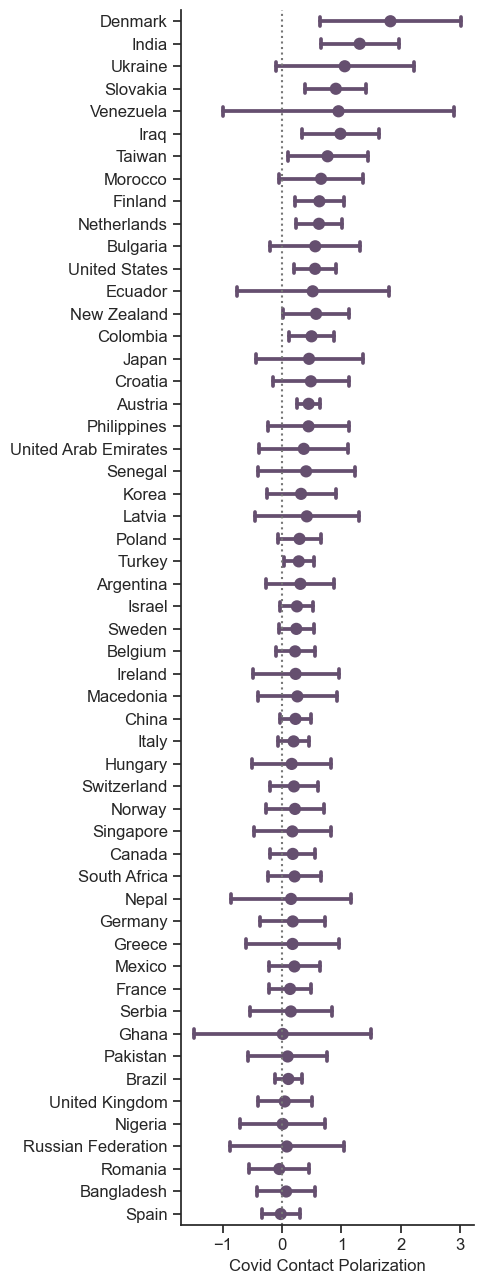

In [65]:
records = []
for groupid, group in df.groupby("Country"):
    # Collect sample size, mean, and var for each Ide_extremesology
    n, mean, var = [], [], []
    # Drop NaN Ide_extremesology and sort by Ide_extremesology; Conservative will always come FIRST
#     group = group.dropna(subset=["Ide_extremes"])
    if group.shape[0] == 0:
        continue # Some countries are all-NaN Ide_extremesology
    for subgroupid, subgroup in group.groupby("Ide_extremes"):
        if subgroupid == 0:
            continue
        if subgroup.shape[0] < 2:
            continue # Some Ide_extremesologies with country have no data
        n.append(subgroup.shape[0])
        mean.append(subgroup["Contact"].mean())
        var.append(subgroup["Contact"].var())
    if len(n) == 2:
        # https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confIde_extremesnce_intervals/bs704_confIde_extremesnce_intervals5.html
        dof = sum(n)-2
        t = stats.t.ppf(.975, dof)
        ci = t * np.sqrt(((n[1]-1)*var[1] + (n[0]-1)*var[0]) / dof) * np.sqrt(1/n[1] + 1/n[0])
        records.append({"Country": groupid, "Contact": mean[1]-mean[0], "err": ci})
dfdiff = pd.DataFrame.from_records(records).sort_values(by="Contact", ascending=False)
dfdiff["absdifference"] = dfdiff["Contact"].abs()
dfdiff = dfdiff.sort_values(by=['absdifference'], ascending=False)
pal = ["#654F6F"]
fig, ax = plt.subplots(1,1, figsize=(5,13))
# dupe = 250
dfCopy = dfdiff.loc[dfdiff.index.repeat(dupe)].copy()
dfCopy["absdifference"] = np.random.normal(dfCopy["absdifference"].values, dfCopy["err"].values)
sns.pointplot(y=dfCopy.Country, x=dfCopy.absdifference, errorbar="sd", orient="h", \
            palette = pal, join=False, capsize=.4,\
            ax=ax)
sns.despine()
plt.axvline(x=0, c="#777777", ls=":")
ax.set_ylabel("")
ax.set_xlabel("Covid Contact Polarization")
# plt.xlim(-100,100)
plt.tight_layout()
plt.savefig('Covid_Contact.png', dpi=600, format="png")